#### iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv에서 2개 Feature 사용
- 구현프레임워크 : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [219]:
# 모듈 로딩
import torch                    # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn           # 인공신경망 관련 모듈
import torch.nn.functional as F    # 손실, 거리 등 함 수관련 모듈
import torch.optim as optimizer # 최적화 기법 관련 모듈
from torchmetrics.regression import R2Score # 성능지표 관련모듈 -추가설치
from torchinfo import summary # 모델 정보 관련 모듈 - 추가설치
import pandas as pd
from sklearn.model_selection import train_test_split


In [220]:
torch.manual_seed(1)

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'DEVICE : {DEVICE}')

DEVICE : cpu


In [221]:
# 데이터 준비
FILE = r'C:\Users\zizonkjs\머신러닝,딥러닝\data\iris.csv'
irisdf = pd.read_csv(FILE, usecols=[0,1,2,3])
irisdf



,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[2] 모델준비
학습방법 : 지도학습 > 회귀
알고리즘 : 선형관계 >> 선형모델 ==> nn.Linear

In [222]:
# 인공 신경망 모델설계
model = nn.Sequential(  nn.Linear(3, 10), # 입력층 (피쳐수, )
                        nn.ReLU(),
                        nn.Linear(10,5), # 은닉층 (입력층의 10(퍼셉트론)을 상속)
                        nn.ReLU(),
                        nn.Linear(5,1)) # 출력층 ( 은닉층의 50(퍼셉트론)을 상속)  (, 이진분류는는 항상 1)

# 가중치와 절편 확인
for name, param in model.named_parameters():
    print(f'[{name}] {param} \n')

# 모델 구조 확인
print(model)
summary(model, input_size=(150,3))

[0.weight] Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119],
        [ 0.2710, -0.5435,  0.3462],
        [-0.1188,  0.2937,  0.0803],
        [-0.0707,  0.1601,  0.0285],
        [ 0.2109, -0.2250, -0.0421],
        [-0.0520,  0.0837, -0.0023],
        [ 0.5047,  0.1797, -0.2150],
        [-0.3487, -0.0968, -0.2490],
        [-0.1850,  0.0276,  0.3442],
        [ 0.3138, -0.5644,  0.3579]], requires_grad=True) 

[0.bias] Parameter containing:
tensor([ 0.1613,  0.5476,  0.3811, -0.5260, -0.5489, -0.2785,  0.5070, -0.0962,
         0.2471, -0.2683], requires_grad=True) 

[2.weight] Parameter containing:
tensor([[ 0.3103, -0.1338,  0.2371,  0.0037, -0.1666,  0.1625, -0.1679,  0.0930,
         -0.0913, -0.0347],
        [-0.3040, -0.1508,  0.1716, -0.0769,  0.3150,  0.2535, -0.0148, -0.2111,
          0.1926,  0.0981],
        [-0.2044,  0.2054,  0.1920,  0.2805, -0.1773, -0.0521, -0.0061,  0.0462,
         -0.2400, -0.2244],
        [ 0.1720, -0.0742,  0.1545,  0.0180,  0.1038, 

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [150, 1]                  --
├─Linear: 1-1                            [150, 10]                 40
├─ReLU: 1-2                              [150, 10]                 --
├─Linear: 1-3                            [150, 5]                  55
├─ReLU: 1-4                              [150, 5]                  --
├─Linear: 1-5                            [150, 1]                  6
Total params: 101
Trainable params: 101
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.02

[3] 최적화 인스턴스 준비

In [223]:
### 모델의 가중치와 절편을 최적화 ==> 인스턴스에 전달
adam_optim = optimizer.Adam(model.parameters(), lr=0.1)

[4] 모델 학습 => 개발자가 구현


[4-1] 데이터셋 Tensor화 진행 : 데이터 준비 시 진행 하거나 또는 학습전에 진행

In [224]:
# 피쳐와 타겟을 분리
featureTS =irisdf[irisdf.columns[:-1]]
print(featureTS.shape)

targetTS= irisdf[['petal.width']]
print(targetTS.shape)

(150, 3)
(150, 1)


In [225]:
X_train, X_test, y_train, y_test = train_test_split(featureTS, 
                                                    targetTS,
                                                    test_size=0.2,
                                                    random_state=5)

# Train & Valid
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train,
                                                    test_size=0.2)
print(f'Train {X_train.shape}, TEST {X_test.shape}, VAL {X_val.shape}')
print(f'Train {y_train.shape}, TEST {y_test.shape}, VAL {y_val.shape}')

Train (96, 3), TEST (30, 3), VAL (24, 3)
Train (96, 1), TEST (30, 1), VAL (24, 1)


[4-2] 학습진행 
    *학습횟수 결정 ==> 에폭 설정
    
    *배치크기 결정

    * 배치개수 계산

In [226]:
# import math as m
# 97/12, m.ceil(91/10)
# 처음부터 끝까지 공부하는 횟수 : 100
# 1 에폭에서 한 번 학습할 분량 크기 : 12
# 1 에폭에서 총 학습 횟수이면서 가중치 업데이트 횟수 : 8
EPOCH=100
BATCH_SIZE = 12
BATCH_CNT = X_train.shape[0]//BATCH_SIZE
print(f'EPOCH: {EPOCH}, BATCH_SZIE: {BATCH_SIZE}, BATCH_CNT:{BATCH_CNT}')

EPOCH: 100, BATCH_SZIE: 12, BATCH_CNT:8


In [227]:
## 테스트/검증 함수
# ==> 가중치, 절편 업데이트 X, 최적화 미진행
# ==> 현재 가중치와 절편값으로 테스트 진행
# 모델 학습 함수
def testing(test_TS, targetTS, kind='Val'):
    # Tensor 화
    test_TS = torch.FloatTensor(test_TS.values).to(DEVICE)
    targetTS = torch.FloatTensor(targetTS.values).to(DEVICE)
    

    with torch.no_grad(): # 가중치 및 절편 업데이트 진행 금지
        # 1. 학습 진행 forward
        pre_y=model(test_TS)

        # 2. 오차 계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
        R2 = R2Score()(pre_y, targetTS)
        

        # 4. 학습결과 출력 및 저장
        print(f'[{kind}] {kind} LOSS : {loss}')

    return loss, R2

In [228]:
def training(featureTS, targetTS, valTS, valTargetTS):
    
    loss_history=[[],[]]
    r2_history = [[],[]]

    for epoch in range(EPOCH):
        # 배치 손실 저장 변수
        bs_loss, bs_r2 = 0,0
        # 배치 크기 만큼 학습진행
        for i in range(BATCH_CNT):
            start = i*BATCH_SIZE
            end = start + BATCH_SIZE
            print(start, end)

            # BS크기만큼 데이터 추출해서 Tensor화 진행
            BSX_train = torch.FloatTensor(X_train[start:end].values).to(DEVICE)
            BSy_train = torch.FloatTensor(y_train[start:end].values).to(DEVICE)
            print(BSX_train.shape, BSX_train.device, BSX_train.dtype)
            print(BSy_train.shape, BSy_train.device, BSy_train.dtype)

           
            # 1. 학습 진행 forward
        
            pre_y=model(BSX_train)
            print(f'pre_y.shape : {pre_y.shape}')


            # 2. 오차 계산 - 손실함수
            loss = F.mse_loss(pre_y, BSy_train)
            bs_loss += loss.item()
            bs_r2 +=R2Score()(pre_y, BSy_train).item()

            # 3. 최적화 - 가중치, 절편 업데이트 backward
            adam_optim.zero_grad()
            loss.backward()
            adam_optim.step()

            # 4. 검증 : 모델이 제대로 만들어 지는 검사
            val_loss, val_r2=testing(valTS,valTargetTS)
            loss_history[1].append(val_loss.item())
            r2_history[1].append(val_loss.item())

            #에폭 단위 손실과 성능지표
            loss_history[0].append(bs_loss/BATCH_CNT)
            r2_history[0].append(bs_r2/BATCH_CNT)

            # 4. 학습결과 출력 및 저장
            print(f'[{epoch}/{EPOCH} ]\n-Train LOSS : {loss_history[0][-1]} R2: {r2_history[0][-1]}')
            print(f'-VALID LOSS : {loss_history[1][-1]} R2: {r2_history[1][-1]}')

    return loss_history, r2_history

In [229]:
loss, r2=training(X_train, y_train, X_val, y_val)

0 12
torch.Size([12, 3]) cpu torch.float32
torch.Size([12, 1]) cpu torch.float32
pre_y.shape : torch.Size([12, 1])
[Val] Val LOSS : 0.9906905293464661
[0/100 ]
-Train LOSS : 0.13690808415412903 R2: -0.3470976948738098
-VALID LOSS : 0.9906905293464661 R2: 0.9906905293464661
12 24
torch.Size([12, 3]) cpu torch.float32
torch.Size([12, 1]) cpu torch.float32
pre_y.shape : torch.Size([12, 1])
[Val] Val LOSS : 0.8965694904327393
[0/100 ]
-Train LOSS : 0.2826647013425827 R2: -0.47331178188323975
-VALID LOSS : 0.8965694904327393 R2: 0.8965694904327393
24 36
torch.Size([12, 3]) cpu torch.float32
torch.Size([12, 1]) cpu torch.float32
pre_y.shape : torch.Size([12, 1])
[Val] Val LOSS : 0.8364090919494629
[0/100 ]
-Train LOSS : 0.3207257054746151 R2: -0.4735582172870636
-VALID LOSS : 0.8364090919494629 R2: 0.8364090919494629
36 48
torch.Size([12, 3]) cpu torch.float32
torch.Size([12, 1]) cpu torch.float32
pre_y.shape : torch.Size([12, 1])
[Val] Val LOSS : 0.784267246723175
[0/100 ]
-Train LOSS : 0.4

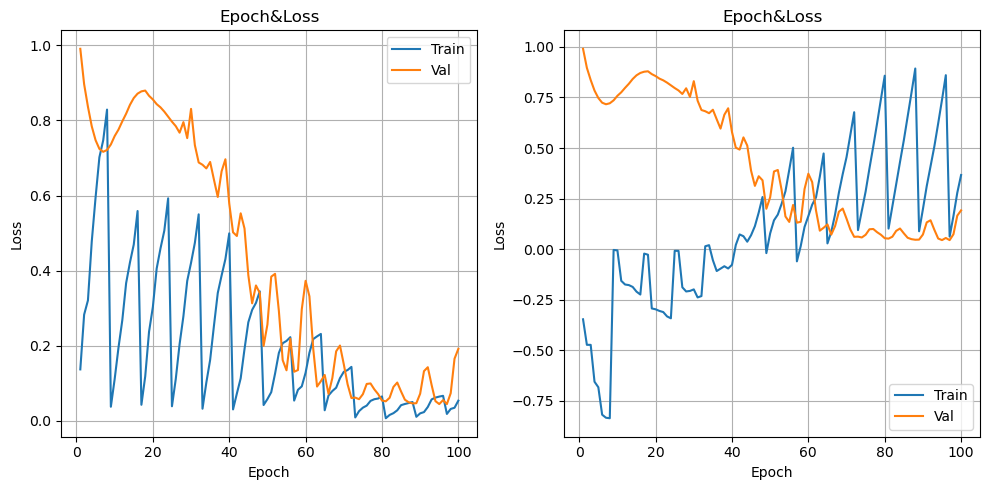

In [230]:
import matplotlib.pyplot as plt

THRESHOLD=100
fg, axes=plt.subplots(1,2,figsize=(10,5))
axes[0].plot(range(1, THRESHOLD+1), loss[0][:THRESHOLD], label='Train')
axes[0].plot(range(1, THRESHOLD+1), loss[1][:THRESHOLD], label='Val')
axes[0].grid()
axes[0].legend()
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Epoch&Loss')

axes[1].plot(range(1, THRESHOLD+1), r2[0][:THRESHOLD], label='Train')
axes[1].plot(range(1, THRESHOLD+1), r2[1][:THRESHOLD], label='Val')
axes[1].grid()
axes[1].legend()
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Epoch&Loss')
plt.tight_layout()
plt.show()

In [231]:
# 보스턴 집값 torch Linear 만들어오기